The estimated price of the Asian option is: 3.41


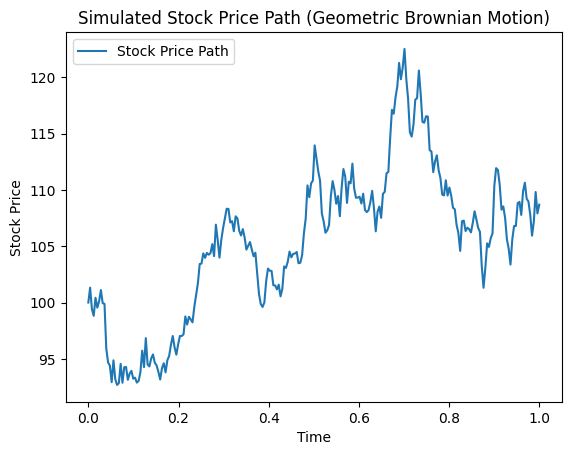

In [2]:
import numpy as np

# Define parameters
S0 = 100  # Initial stock price
K = 105  # Strike price
T = 1.0  # Time to maturity (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility of the underlying asset
N = 252  # Number of time steps (daily observations for a year)
M = 10000  # Number of Monte Carlo simulations

# Generate stock price paths using Geometric Brownian Motion (GBM)
dt = T / N
t = np.linspace(0, T, N)

# Simulating the stock price paths
np.random.seed(42)  # Set seed for reproducibility
Z = np.random.normal(size=(M, N))  # Random normal variables for each time step
S = np.zeros((M, N))  # Stock price paths
S[:, 0] = S0  # Initial stock price

# Iterate over each time step and calculate stock prices
for i in range(1, N):
    S[:, i] = S[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, i])

# Calculate the average stock price for each path
S_avg = S.mean(axis=1)

# Calculate the payoff for an Average Price Call Option
payoff = np.maximum(S_avg - K, 0)

# Discount back the payoff to get the present value
price = np.exp(-r * T) * np.mean(payoff)

print(f"The estimated price of the Asian option is: {price:.2f}")

# Plot one of the simulated paths as an example
import matplotlib.pyplot as plt

plt.plot(t, S[1], label='Stock Price Path')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Price Path (Geometric Brownian Motion)')
plt.legend()
plt.show()
